### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Datasets/HousePricePrediction/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
df.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.002742
LotFrontage      0.155586
LotArea          0.000000
                   ...   
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SaleType         0.000685
SaleCondition    0.000000
Length: 80, dtype: float64

<AxesSubplot:>

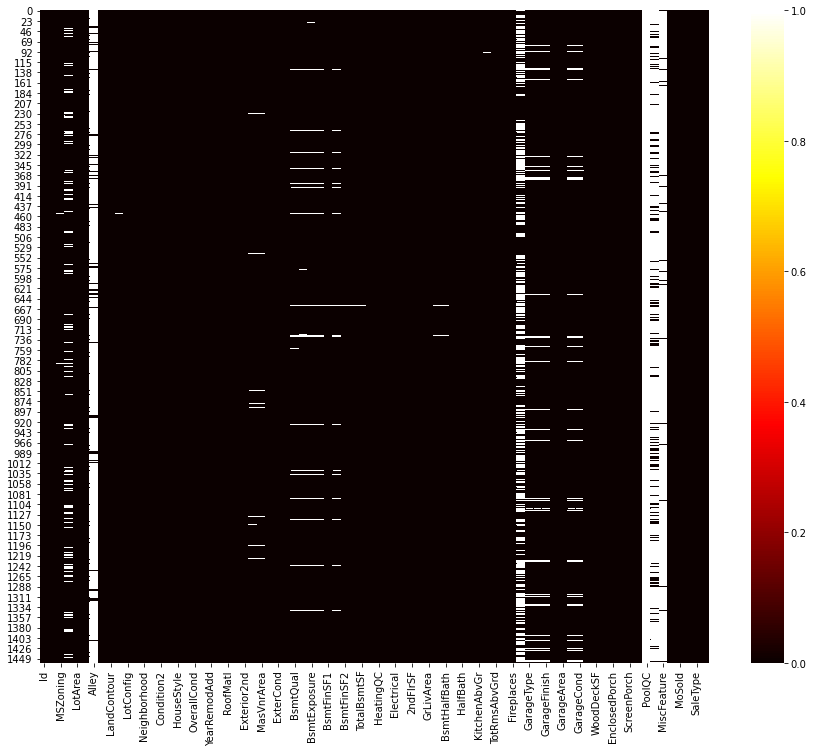

In [4]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cmap='hot')

In [5]:
num_feat = [feature for feature in df.columns if df[feature].dtype!='O']
print(len(num_feat), ' Numerical features')
num_feat

37  Numerical features


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [6]:
time_feat = [feature for feature in num_feat if 'Year' in feature or 'Yr' in feature]
time_feat

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [7]:
disc_feat = [feature for feature in num_feat if len(df[feature].unique())<10 and feature not in time_feat]
print(len(disc_feat),' Discrete features')
disc_feat

10  Discrete features


['OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'PoolArea']

In [8]:
cont_feat = [feature for feature in num_feat if feature not in disc_feat and feature not in time_feat]
print(len(cont_feat), ' Continuous features')
cont_feat

23  Continuous features


['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'MoSold']

In [9]:
nan_cont_feat = [feature for feature in cont_feat if df[feature].isnull().sum()>0]
print('there are ', len(nan_cont_feat), 'continuous features with missing value')
nan_cont_feat

there are  7 continuous features with missing value


['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea']

In [10]:
df[nan_cont_feat].head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,GarageArea
0,80.0,0.0,468.0,144.0,270.0,882.0,730.0
1,81.0,108.0,923.0,0.0,406.0,1329.0,312.0
2,74.0,0.0,791.0,0.0,137.0,928.0,482.0
3,78.0,20.0,602.0,0.0,324.0,926.0,470.0
4,43.0,0.0,263.0,0.0,1017.0,1280.0,506.0


In [11]:
df['MasVnrArea'] = df['MasVnrArea'].replace({0.0: np.nan})

In [12]:
for feature in nan_cont_feat:
    df[feature] = df[feature].fillna(df[feature].mean())

In [13]:
nan_disc_feat = [feature for feature in disc_feat if df[feature].isnull().sum()>0]
print('There are ', len(nan_disc_feat), ' discrete feature with nan values')
nan_disc_feat

There are  3  discrete feature with nan values


['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']

In [14]:
for feature in nan_disc_feat:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

In [15]:
nan_time_feat = [feature for feature in time_feat if df[feature].isnull().sum()>0]
nan_time_feat

['GarageYrBlt']

In [16]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [17]:
cat_feat = [feature for feature in df.columns if df[feature].dtype=='O']
print(len(cat_feat), ' Categorical features')
cat_feat

43  Categorical features


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [18]:
nan_cat_feat = [feature for feature in cat_feat if df[feature].isnull().sum()>0]
print(len(nan_cat_feat), ' categorical features contains missing values')
nan_cat_feat

22  categorical features contains missing values


['MSZoning',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [19]:
df[nan_cat_feat].head()

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RH,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,Rec,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,MnPrv,NaN,WD
1,RL,NaN,AllPub,Wd Sdng,Wd Sdng,BrkFace,TA,TA,No,ALQ,...,Typ,NaN,Attchd,Unf,TA,TA,NaN,NaN,Gar2,WD
2,RL,NaN,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,...,Typ,TA,Attchd,Fin,TA,TA,NaN,MnPrv,NaN,WD
3,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,TA,TA,No,GLQ,...,Typ,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN,WD
4,RL,NaN,AllPub,HdBoard,HdBoard,None,Gd,TA,No,ALQ,...,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD


In [20]:
df[nan_cat_feat].isnull().mean()

MSZoning        0.002742
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageFinish    0.053461
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

In [21]:
feat_to_drop = [feature for feature in nan_cat_feat if df[feature].isnull().mean()>0.70]
feat_to_drop

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [22]:
df.drop(columns=feat_to_drop, inplace=True)

In [23]:
for feature in nan_cat_feat:
    if feature in feat_to_drop:
        pass
    else:
        df[feature] = df[feature].fillna(df[feature].mode()[0])

In [24]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

In [25]:
df['SaleType'].fillna(df['SaleType'].mode()[0], inplace=True)

### Checking if any more null values left in dataset

<AxesSubplot:>

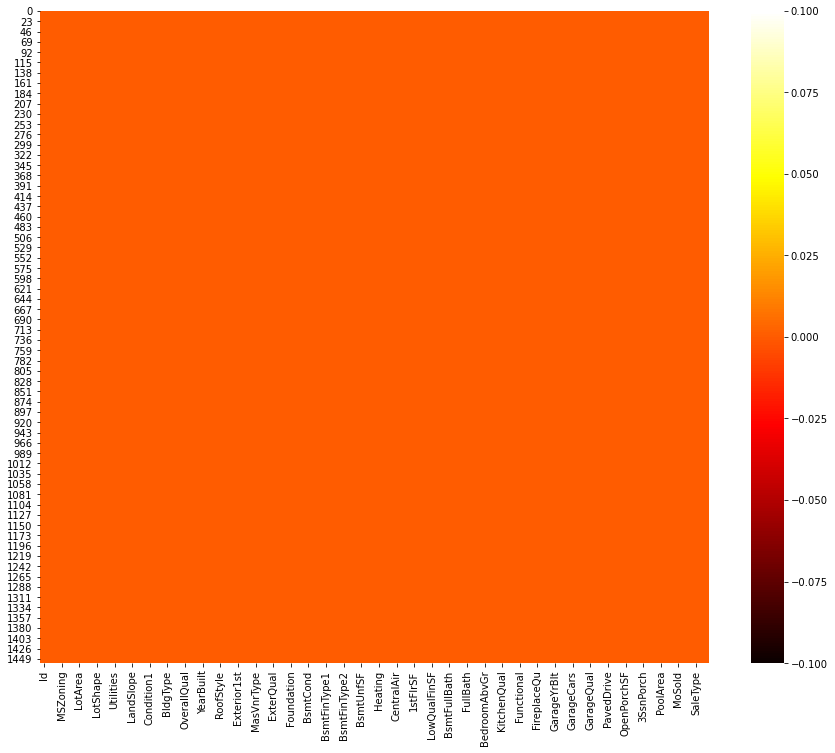

In [26]:
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cmap='hot')

In [27]:
nan = [feature for feature in df.columns if df[feature].isnull().sum()>0]
nan

[]

In [28]:
df[time_feat].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,1961,1961,1961.0,2010
1,1958,1958,1958.0,2010
2,1997,1998,1997.0,2010
3,1998,1998,1998.0,2010
4,1992,1992,1992.0,2010


In [29]:
df['YearBuilt'] = df['YrSold'] - df['YearBuilt']
df['YearRemodAdd'] = df['YrSold'] - df['YearRemodAdd']
df['GarageYrBlt'] = df['YrSold'] - df['GarageYrBlt']

In [30]:
df.drop('YrSold', axis=1, inplace=True)

In [31]:
df.to_csv('D:/Datasets/HousePricePrediction/formatedTest.csv', index=False)